<a href="https://colab.research.google.com/github/Rudy-Nzau/Buildings-Energy-Consumption-Forecast/blob/main/Projet_4_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import et environnement**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


## **Chargement data set**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Openclassrooms/Projet_4/data_energy_cleaned2.csv')

In [ ]:
data.head()

,index,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUseWN(kBtu),Outlier,Latitude,Longitude,TotalGHGEmissions,Log2-SiteEnergyUseWN(kBtu)
0,0,2015,NonResidential,Residence/Hotel/Senior Care/Housing,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Residence/Hotel/Senior Care/Housing,88434.0,Other,0.0,Other,0.0,65.0,7097539.0,Normal,47.612190,-122.337997,249.43,22.758888
1,5,2015,Nonresidential COS,Other,7,DOWNTOWN,1999,1.0,2.0,97288,37198,60090,Offices,88830.0,Other,0.0,Other,0.0,NaN,13045258.0,Normal,47.616439,-122.336764,304.62,23.637022
2,6,2015,NonResidential,Residence/Hotel/Senior Care/Housing,7,DOWNTOWN,1926,1.0,11.0,83008,0,83008,Residence/Hotel/Senior Care/Housing,81352.0,Other,0.0,Other,0.0,25.0,6477493.0,Normal,47.614114,-122.332741,208.46,22.627004
3,7,2015,NonResidential,Other,7,DOWNTOWN,1926,1.0,8.0,102761,0,102761,Leisure,102761.0,Other,0.0,Other,0.0,NaN,7380086.0,Normal,47.612902,-122.331309,199.99,22.815206
4,8,2015,NonResidential,Residence/Hotel/Senior Care/Housing,7,DOWNTOWN,1904,1.0,15.0,163984,0,163984,Residence/Hotel/Senior Care/Housing,163984.0,Other,0.0,Other,0.0,46.0,13589025.0,Normal,47.602589,-122.332553,331.61,23.695939


In [ ]:
data.dtypes

index                              int64  
DataYear                           int64  
BuildingType                       object 
PrimaryPropertyType                object 
CouncilDistrictCode                int64  
Neighborhood                       object 
YearBuilt                          int64  
NumberofBuildings                  float64
NumberofFloors                     float64
PropertyGFATotal                   int64  
PropertyGFAParking                 int64  
PropertyGFABuilding(s)             int64  
LargestPropertyUseType             object 
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType       object 
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType        object 
ThirdLargestPropertyUseTypeGFA     float64
ENERGYSTARScore                    float64
SiteEnergyUseWN(kBtu)              float64
Outlier                            object 
Latitude                           float64
Longitude                          float64
TotalGHGEmi

In [ ]:
data.shape

(5748, 25)

In [ ]:
data.isna().sum().sum()

1459

In [ ]:
#sauvegarde séparée du energy star score
energy_star_score = data['ENERGYSTARScore']
data.drop('ENERGYSTARScore', axis=1, inplace=True)

In [ ]:
data.shape

(5748, 24)

In [ ]:
data.isna().sum().sum()

0

# **Vecteurs  et matrices**

**X et y**

In [ ]:
y = data.copy()[{'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions' , 'Log2-SiteEnergyUseWN(kBtu)'}]
X = data.copy().drop(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions', 'Log2-SiteEnergyUseWN(kBtu)'], axis=1)

In [ ]:
X.select_dtypes(['category','object']).nunique()


BuildingType                    8 
PrimaryPropertyType             12
Neighborhood                    13
LargestPropertyUseType          12
SecondLargestPropertyUseType    12
ThirdLargestPropertyUseType     12
Outlier                         3 
dtype: int64

In [ ]:
X.shape


(5748, 21)

In [ ]:
categorical_columns = X.select_dtypes(['category','object']).columns
numerical_columns = X.select_dtypes(['int32','float64']).columns

In [ ]:
categorical_columns


Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType', 'Outlier'],
      dtype='object')

In [ ]:

from sklearn.preprocessing import OneHotEncoder, StandardScaler

ohe = OneHotEncoder(sparse=False)
ss = StandardScaler()
X[numerical_columns] = ss.fit_transform(X[numerical_columns])
ohe.fit_transform(X[categorical_columns])

X = pd.merge(X[numerical_columns], 
          pd.DataFrame(columns = ohe.get_feature_names().tolist(),
              data = ohe.fit_transform(X[categorical_columns])),
        left_index = True, right_index = True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import re
regex = re.compile(r'x\d_')
for column in X.columns:
    if regex.search(column):
        X[column] = X[column].astype('int32')

In [ ]:
X.sample(5)


,NumberofBuildings,NumberofFloors,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,Latitude,Longitude,x0_Campus,x0_Multifamily HR (10+),x0_Multifamily LR (1-4),x0_Multifamily MR (5-9),x0_NonResidential,x0_Nonresidential COS,x0_Nonresidential WA,x0_SPS-District K-12,x1_Education,x1_Facility,x1_Health,x1_Leisure,x1_Office,x1_Offices,x1_Other,x1_Residence/Hotel/Senior Care/Housing,x1_Retail,x1_Storage,x1_Supermarket / Grocery Store,x1_Warehouse,x2_BALLARD,x2_CENTRAL,x2_DELRIDGE,x2_DOWNTOWN,x2_EAST,x2_GREATER DUWAMISH,x2_LAKE UNION,x2_MAGNOLIA / QUEEN ANNE,x2_NORTH,x2_NORTHEAST,x2_NORTHWEST,x2_SOUTHEAST,x2_SOUTHWEST,x3_Education,x3_Facility,x3_Health,x3_Leisure,x3_Office,x3_Offices,x3_Other,x3_Parking,"x3_Personal Services (Health/Beauty, Dry Cleaning, etc)",x3_Residence/Hotel/Senior Care/Housing,x3_Retail,x3_Storage,x4_Education,x4_Facility,x4_Health,x4_Leisure,x4_Office,x4_Offices,x4_Other,x4_Parking,"x4_Personal Services (Health/Beauty, Dry Cleaning, etc)",x4_Residence/Hotel/Senior Care/Housing,x4_Retail,x4_Storage,x5_Education,x5_Facility,x5_Health,x5_Leisure,x5_Office,x5_Offices,x5_Other,x5_Parking,"x5_Personal Services (Health/Beauty, Dry Cleaning, etc)",x5_Residence/Hotel/Senior Care/Housing,x5_Retail,x5_Storage,x6_High Outlier,x6_Low Outlier,x6_Normal
2813,-0.034419,0.489769,0.255048,-0.067008,-0.159065,-0.134186,1.188627,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3657,-0.034419,-0.601920,-0.447785,-0.362042,-0.159065,-1.318319,-1.572254,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3864,-0.034419,-0.874842,-0.620551,-0.362042,-0.159065,-0.293921,-0.012663,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1193,-0.034419,-0.601920,-0.104470,-0.362042,-0.159065,-1.755129,-1.450106,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
123,-0.034419,-0.874842,0.130560,-0.362042,-0.159065,-1.826153,1.455330,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


## **Infos sur X et Y**

In [ ]:
X.shape


(5748, 79)

In [ ]:
y.shape


(5748, 3)

# **Séparation test/train**




In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
                        train_test_split(X, 
                                         y['Log2-SiteEnergyUseWN(kBtu)'],  
                                         test_size = 0.2, 
                                         random_state = 42
                                        )

In [ ]:
X_train.shape


(4598, 79)

In [ ]:
X_test.shape


(1150, 79)

In [ ]:
y_train.shape

(4598,)

In [ ]:
y_test.shape


(1150,)

In [ ]:
results = pd.DataFrame({})

In [ ]:
print(X_train.isna().sum().sum())
print(X_test.isna().sum().sum())
print(y_train.isna().sum().sum())
print(y_test.isna().sum().sum())

0
0
0
0


# **Modelisation**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

## **Linear regression/ Ridge Regression / Elastic Net**

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
parameters = {'tol' : [0.1,0.01,0.001,0.0001],
              "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],  #alpha, coef qui multiplie le terme de pénalité)
              "l1_ratio": np.arange(0.0, 1.0, 0.1)}#L1 ratio , =1 équivaut à un Lasso, 0 à un Ridge


elastic_grid = GridSearchCV(estimator = ElasticNet(), 
                      param_grid = parameters,
                      scoring = 'neg_mean_squared_error',
                      cv=5,
                      verbose=0
                     )

elastic_grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.179e+03, tolerance: 1.146e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.819e+03, tolerance: 1.068e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'tol': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error')

In [ ]:
elastic_grid.best_params_

{'alpha': 0.001, 'l1_ratio': 0.6000000000000001, 'tol': 0.1}

In [ ]:
import math
results = results.append(pd.DataFrame({
    'Modèle' : ['Elasticnet Regression'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(elastic_grid.predict(X_test), y_test))]}),
              ignore_index=True)

## **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

parameters = {
    'n_estimators' : [10,50,100,300,500], #nombre d'arbres de décision
    'min_samples_leaf' : [1,3,5,10], #nombre de feuilles minimales dans un noeud
    'max_features': ['auto', 'sqrt'] #nombre de features observées pour chaque arbre
}

In [ ]:
rfr_search = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                               #scoring='mean_squared_error',
                              verbose=2,
                               cv=5)

rfr_search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.3s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.3s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.3s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.3s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.3s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   1.4s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   1.4s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   1.4s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   1.5s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   1.5s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   2.9s
[CV] END max_

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [10, 50, 100, 300, 500]},
             verbose=2)

In [ ]:
rfr_search.best_params_

{'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 500}

In [ ]:
import math
results = results.append(pd.DataFrame({
    'Modèle' : ['Random Forest Regressor'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(rfr_search.predict(X_test), y_test))]}),
              ignore_index=True)

In [ ]:
coefficients = abs(rfr_search.best_estimator_.feature_importances_)
liste_coefs_rer = pd.concat((pd.DataFrame(X.columns, columns = ['Variable']), 
                      pd.DataFrame(coefficients, columns = ['Coefficient'])), axis = 1).sort_values(by='Coefficient', ascending = False)

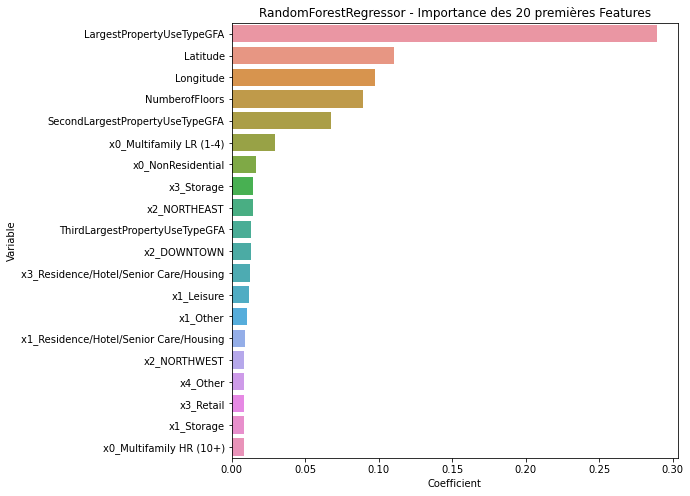

In [ ]:
plt.figure(figsize=(8,8))
plt.title('RandomForestRegressor - Importance des 20 premières Features')
sns.barplot(y = liste_coefs_rer['Variable'].head(20),
            x = liste_coefs_rer['Coefficient'].head(20))
plt.show()

# **Support vectore regression**

In [ ]:
from sklearn.svm import SVR

parameters = {'gamma' : [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1], #kernel coefficient [ici kernel = Radial Basis Function]
              'epsilon' : [0.001, 0.01, 0.1, 1], #erreur tolérée par l'algorithme
              'C' : [0.001, 0.01, 0.1, 1, 10]} #parametre de régularisation

svm = GridSearchCV(estimator = SVR(), 
                      param_grid = parameters,
                      #scoring = 'neg_mean_squared_error',
                      cv=5,
                   verbose=2
                     )

svm.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   2.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   2.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   2.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   2.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   2.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   2.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   2.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   1.9s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   2.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   2.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-06; total time=   2.0s
[CV] END ................C=0.001, epsilon=0.00

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'epsilon': [0.001, 0.01, 0.1, 1],
                         'gamma': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1]},
             verbose=2)

In [ ]:

svm.best_params_


{'C': 10, 'epsilon': 0.1, 'gamma': 0.1}

In [ ]:
results = results.append(pd.DataFrame({
    'Modèle' : ['Support Vector Machine'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(svm.predict(X_test), y_test))]}),
              ignore_index=True)

# **XG BOOST**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
parameters = {
    'n_estimators' : [100,500,1000,2000]
}
xgb_grid = GridSearchCV(XGBRegressor(n_jobs=-1),
                        param_grid = parameters,
                      #scoring = 'neg_mean_squared_error',
                        cv = 5,
                        verbose=5)
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[22:21:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/5] END ..................n_estimators=100;, score=0.730 total time=   0.7s
[22:21:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/5] END ..................n_estimators=100;, score=0.540 total time=   0.6s
[22:21:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 3/5] END ..................n_estimators=100;, score=0.514 total time=   0.6s
[22:21:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 4/5] END ..................n_estimators=100;, score=0.571 total time=   0.6s
[22:21:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

GridSearchCV(cv=5, estimator=XGBRegressor(n_jobs=-1),
             param_grid={'n_estimators': [100, 500, 1000, 2000]}, verbose=5)

In [ ]:
xgb_grid.best_params_


{'n_estimators': 1000}

In [ ]:
xgb_grid.best_estimator_


XGBRegressor(n_estimators=1000, n_jobs=-1)

In [ ]:
xgb_grid.best_estimator_.feature_importances_


array([0.02481932, 0.01140361, 0.05366834, 0.01004252, 0.01443709,
       0.01100618, 0.0147924 , 0.01404577, 0.00426091, 0.05515345,
       0.01187518, 0.02925246, 0.01515568, 0.        , 0.00219652,
       0.01904273, 0.00519671, 0.00269755, 0.07855707, 0.00175823,
       0.00260184, 0.02701766, 0.01034383, 0.00558681, 0.01035965,
       0.06321386, 0.00251432, 0.00675284, 0.00365541, 0.00124523,
       0.02201283, 0.00587489, 0.00854196, 0.00257208, 0.00521532,
       0.00405444, 0.07507273, 0.00837072, 0.00202411, 0.01514752,
       0.00708371, 0.00362145, 0.03059353, 0.01225298, 0.0032513 ,
       0.0054728 , 0.00616565, 0.00541232, 0.00015615, 0.01732958,
       0.03429193, 0.04425753, 0.        , 0.00120266, 0.0171863 ,
       0.00778448, 0.00525778, 0.00530736, 0.01025098, 0.01165278,
       0.00172739, 0.00578293, 0.00290981, 0.00043212, 0.00034407,
       0.00075116, 0.00034501, 0.00501804, 0.00070965, 0.00096295,
       0.        , 0.00138994, 0.0024797 , 0.00710026, 0.00164

In [ ]:
import math
results = results.append(pd.DataFrame({
    'Modèle' : ['XGBoost'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(xgb_grid.predict(X_test), y_test))]}),
              ignore_index=True)

In [ ]:
results


,Modèle,Score_RMSE
0,Elasticnet Regression,0.906957
1,Random Forest Regressor,0.629762
2,Support Vector Machine,0.685169
3,XGBoost,0.653062


# **Export des modèles**

In [ ]:
rfr_search


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [10, 50, 100, 300, 500]},
             verbose=2)

In [ ]:
dict_modeles = {
    'Elastic Net': elastic_grid.best_estimator_,
    'Random Forest Regressor' : rfr_search.best_estimator_,
    'SVM' : svm.best_estimator_,
    'XGBoost' : xgb_grid.best_estimator_,

}


In [ ]:
import pickle
for nom, model in dict_modeles.items():
    filename = 'models/' + nom + '.obj' 
    

In [ ]:
with open('data_pick.pkl', 'wb') as pickle_file :
        pickle.dump(dict_modeles, pickle_file)

In [ ]:
with open('data_pick.pkl','rb') as pickle_file:
    new_data = pickle.load(pickle_file)

[22:23:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
new_data

{'Elastic Net': ElasticNet(alpha=0.001, l1_ratio=0.6000000000000001, tol=0.1),
 'Random Forest Regressor': RandomForestRegressor(max_features='sqrt', n_estimators=500),
 'SVM': SVR(C=10, gamma=0.1),
 'XGBoost': XGBRegressor(missing=nan, n_estimators=1000, n_jobs=-1)}

In [ ]:
#Export du one hot encoder

with  open('onehotencoder', 'wb') as pickle_file :
    pickle.dump(ohe, pickle_file)
    
#export du standardscaler
with  open('standardscaler', 'wb') as pickle_file :
    pickle.dump(ss, pickle_file)

# **Chargement des modèles**

In [ ]:
dict_modeles_new = dict_modeles


In [ ]:
dict_modeles_new = {}


In [ ]:
import glob
import pickle
for filename in glob.glob('models/*'):
    if filename not in ['onehotencoder', 'standardscaler']:
        with open(filename, 'rb') as pickle_file:
            print(filename)
            dict_modeles_new[str(filename)] = pickle.load(pickle_file)

In [ ]:
dict_modeles['XGBoost'].feature_importances_


array([0.02481932, 0.01140361, 0.05366834, 0.01004252, 0.01443709,
       0.01100618, 0.0147924 , 0.01404577, 0.00426091, 0.05515345,
       0.01187518, 0.02925246, 0.01515568, 0.        , 0.00219652,
       0.01904273, 0.00519671, 0.00269755, 0.07855707, 0.00175823,
       0.00260184, 0.02701766, 0.01034383, 0.00558681, 0.01035965,
       0.06321386, 0.00251432, 0.00675284, 0.00365541, 0.00124523,
       0.02201283, 0.00587489, 0.00854196, 0.00257208, 0.00521532,
       0.00405444, 0.07507273, 0.00837072, 0.00202411, 0.01514752,
       0.00708371, 0.00362145, 0.03059353, 0.01225298, 0.0032513 ,
       0.0054728 , 0.00616565, 0.00541232, 0.00015615, 0.01732958,
       0.03429193, 0.04425753, 0.        , 0.00120266, 0.0171863 ,
       0.00778448, 0.00525778, 0.00530736, 0.01025098, 0.01165278,
       0.00172739, 0.00578293, 0.00290981, 0.00043212, 0.00034407,
       0.00075116, 0.00034501, 0.00501804, 0.00070965, 0.00096295,
       0.        , 0.00138994, 0.0024797 , 0.00710026, 0.00164

# **Comparaison des modèles**

Comparaison des modèles sur le critère de la division RMSE par la  moyenne de la valeur à prédire.

In [ ]:
results


,Modèle,Score_RMSE
0,Elasticnet Regression,0.906957
1,Random Forest Regressor,0.629762
2,Support Vector Machine,0.685169
3,XGBoost,0.653062


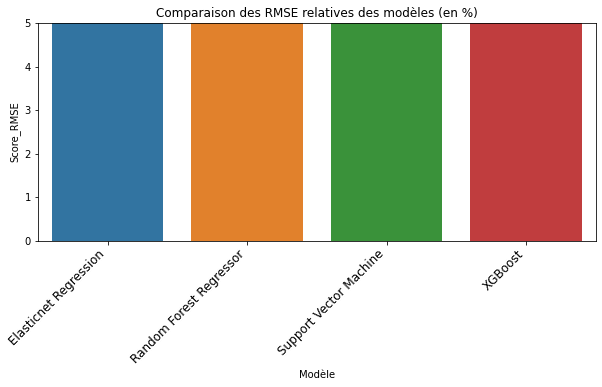

In [ ]:
plt.figure(figsize=(10,4))
plt.title('Comparaison des RMSE relatives des modèles (en %)')
chart = sns.barplot(x = results['Modèle'],
        y = results['Score_RMSE']*100)
chart.set_xticklabels(labels = results['Modèle'], 
                      rotation=45,
                     horizontalalignment='right',
                     size=12,
                     )
ax = plt.gca()
ax.set_ylim([0, 5])
plt.show()

In [ ]:
math.sqrt(mean_squared_error(y_train.mean()*np.ones(y_test.shape[0]), y_test))


1.4973121860465215

In [ ]:
rfr_search.best_estimator_


RandomForestRegressor(max_features='sqrt', n_estimators=500)

In [ ]:
list(dict_modeles.keys())


['Elastic Net', 'Random Forest Regressor', 'SVM', 'XGBoost']

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error


nom_modeles = ['Elastic Net', 'Random Forest Regressor', 'SVM', 'XGBoost']
liste_modeles = [dict_modeles['Elastic Net'],
                 dict_modeles['Random Forest Regressor'],
                 dict_modeles['SVM'],
                 dict_modeles['XGBoost']
                ]

comparaison_score = pd.DataFrame(index = nom_modeles, columns = ['RMSE', 'R2', 'RMSE_relative'])

for nom_modele, modele in zip(nom_modeles, liste_modeles):
    comparaison_score.loc[nom_modele, 'RMSE'] = math.sqrt(mean_squared_error(y_test, modele.predict(X_test)))
    comparaison_score.loc[nom_modele, 'R2'] = r2_score(y_test, modele.predict(X_test))

#normalisation RMSE
comparaison_score['RMSE_relative'] = comparaison_score['RMSE'].divide(comparaison_score['RMSE'].max())

In [ ]:
comparaison_score


,RMSE,R2,RMSE_relative
Elastic Net,0.906957,0.631751,1.0
Random Forest Regressor,0.629762,0.82245,0.694368
SVM,0.685169,0.789834,0.755459
XGBoost,0.653062,0.809069,0.720058


In [ ]:
i=0
for modele in liste_modeles:
    print(nom_modeles[i], ': ')
    i+=1
    %timeit modele.predict(X_train)
    print('')

Elastic Net : 
3.97 ms ± 154 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Random Forest Regressor : 
670 ms ± 5.92 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

SVM : 
2.29 s ± 174 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

XGBoost : 
103 ms ± 1.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)



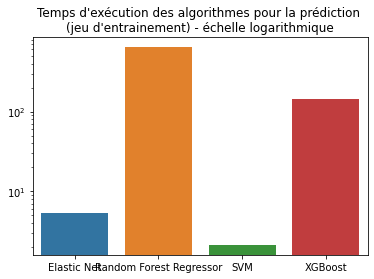

In [ ]:
plt.title('Temps d\'exécution des algorithmes pour la prédiction \n(jeu d\'entrainement) - échelle logarithmique')
sns.barplot(x=nom_modeles,
           y = [5.32, 640, 2.14, 145])
ax = plt.gca()
ax.set_yscale('log')

In [ ]:
comparaison_score_melt = pd.melt(comparaison_score.reset_index(), id_vars = ['index'], value_name = 'score', value_vars=['R2', 'RMSE_relative'])

Text(0.5, 1.0, 'Comparaison des performances des modèles (jeu de test)')

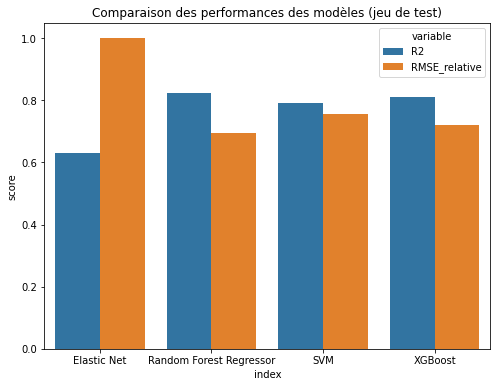

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x = comparaison_score_melt['index'],
            y = comparaison_score_melt['score'], hue = comparaison_score_melt['variable'])
plt.title('Comparaison des performances des modèles (jeu de test)')

# **Verification des prédictions**

In [ ]:
X_extrait = X_test
y_extrait = y_test

In [ ]:
X_extrait.head()


,NumberofBuildings,NumberofFloors,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,Latitude,Longitude,x0_Campus,x0_Multifamily HR (10+),x0_Multifamily LR (1-4),x0_Multifamily MR (5-9),x0_NonResidential,x0_Nonresidential COS,x0_Nonresidential WA,x0_SPS-District K-12,x1_Education,x1_Facility,x1_Health,x1_Leisure,x1_Office,x1_Offices,x1_Other,x1_Residence/Hotel/Senior Care/Housing,x1_Retail,x1_Storage,x1_Supermarket / Grocery Store,x1_Warehouse,x2_BALLARD,x2_CENTRAL,x2_DELRIDGE,x2_DOWNTOWN,x2_EAST,x2_GREATER DUWAMISH,x2_LAKE UNION,x2_MAGNOLIA / QUEEN ANNE,x2_NORTH,x2_NORTHEAST,x2_NORTHWEST,x2_SOUTHEAST,x2_SOUTHWEST,x3_Education,x3_Facility,x3_Health,x3_Leisure,x3_Office,x3_Offices,x3_Other,x3_Parking,"x3_Personal Services (Health/Beauty, Dry Cleaning, etc)",x3_Residence/Hotel/Senior Care/Housing,x3_Retail,x3_Storage,x4_Education,x4_Facility,x4_Health,x4_Leisure,x4_Office,x4_Offices,x4_Other,x4_Parking,"x4_Personal Services (Health/Beauty, Dry Cleaning, etc)",x4_Residence/Hotel/Senior Care/Housing,x4_Retail,x4_Storage,x5_Education,x5_Facility,x5_Health,x5_Leisure,x5_Office,x5_Offices,x5_Other,x5_Parking,"x5_Personal Services (Health/Beauty, Dry Cleaning, etc)",x5_Residence/Hotel/Senior Care/Housing,x5_Retail,x5_Storage,x6_High Outlier,x6_Low Outlier,x6_Normal
1703,-0.034419,-0.328997,-0.540707,-0.308135,-0.159065,1.480401,0.670863,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
5240,-0.034419,0.762691,0.633714,0.803847,-0.159065,-0.493824,0.349614,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
5471,-0.034419,-0.601920,-0.422841,-0.362042,-0.159065,-0.043409,1.742348,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4210,-0.034419,-0.328997,-0.513409,-0.362042,-0.159065,2.244934,0.274828,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1480,-0.034419,-0.874842,-0.586135,-0.298820,-0.159065,-1.098073,-0.573856,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
y_extrait.head()


1703    19.335591
5240    22.219276
5471    20.799023
4210    20.276983
1480    18.141942
Name: Log2-SiteEnergyUseWN(kBtu), dtype: float64

In [ ]:
prediction = dict_modeles['Random Forest Regressor'].predict(X_extrait)


In [ ]:
pd.DataFrame(prediction).isna().sum()


0    0
dtype: int64

In [ ]:
type(y_extrait)


pandas.core.series.Series

In [ ]:
predictions = pd.DataFrame([y_extrait, 
                            pd.Series(prediction, index = y_extrait.index),
                           np.exp2(y_extrait)-1,
                           np.exp2(pd.Series(prediction, index = y_extrait.index))-1]).T
predictions.columns = ['y_log', 'y_predict_log', 'y','y_predict']

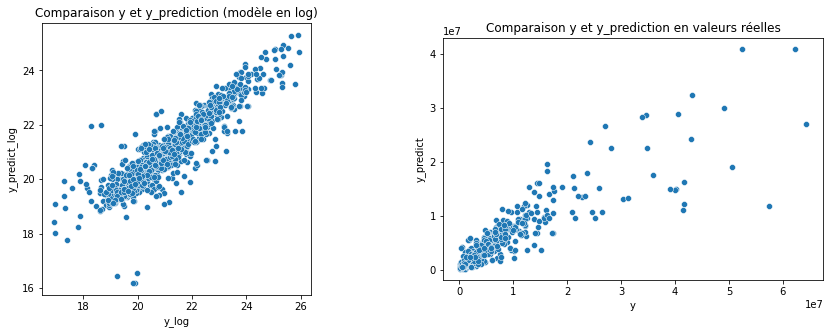

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=False)
sns.scatterplot(x = predictions['y_log'],
               y = predictions['y_predict_log'],
               ax = ax1)
sns.scatterplot(x = predictions['y'],
               y = predictions['y_predict'],
               ax=ax2)
ax1.set_aspect('equal', 'box')

ax2.set_aspect('equal', 'box')

ax1.title.set_text('Comparaison y et y_prediction (modèle en log)')
ax2.title.set_text('Comparaison y et y_prediction en valeurs réelles')

# **Pertinence des variables**

In [ ]:
X_train.shape


(4598, 79)

In [ ]:
X_test.shape


(1150, 79)

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import cross_val_score

#on créee un dictionnaire pour les colonnes crées par le OHE, pour les retrouver dans l'application des permutations
text_columns =[] #les noms des colonnes qui correspondent à des vraies features (pré OHE)
prefixes = [] #les préfixes des colonnes liées à l'application du OHE
index_cols = [] #les indices des colonnes qui correspondent aux features pré OHE et à la première colonne de chaque feature du OHE
regex = re.compile(r'x\d_')
for j, column in enumerate(X.columns):
    if regex.search(column):
        if column[:2] not in prefixes:
            prefixes.append(column[:2])
            index_cols.append(j)
    else:
        text_columns.append(column)
        index_cols.append(j)
        
dict_OHE = {}
for prefix in prefixes:
    temp_list = []
    for column in X.columns:
        if prefix in column:
            temp_list.append(column)
    dict_OHE[prefix] = temp_list
    text_columns.append(prefix)

    
    
#préparation du jeu de données

X_train_permut, X_validation_permut, y_train_permut, y_validation = train_test_split(X_train,
                                        y_train,
                                        test_size=0.2,
                                        random_state=42
                                        )
#choix du modèle utilisé pour la permutation : 


#on boucle sur le nombre de features:
list_features = text_columns
features_score = pd.DataFrame({})

for num_feature in range(len(text_columns)):
    print ('\nBoucle {}.'.format(num_feature+1))
    scores = []
    #on entraine le modèle sur le jeu de données sans les éventuelles features supprimées
    model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=-1, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
    
    #pour chaque feature de X_test:
    for j, feature in zip(index_cols, list_features):
        
        X_validation_temp = X_validation_permut.copy()
        
        #si on identifie une feature en "X0_" : on fait une permutation sur plusieurs colonnes

        if regex.search(X_validation_permut.iloc[:,j].name):
            #print('chaine reconnue')
            prefixe = X_validation_permut.iloc[:,j].name[:2]
            for prefixe_col in dict_OHE[prefixe]:
                index_col = X_validation_permut.columns.get_loc(prefixe_col)
                X_columns_temp = X_validation_temp.iloc[:,index_col]
                #X_test_temp.iloc[:,index_col] = np.random.permutation(X_test_temp.iloc[:,index_col])
                #on permute l'ensemble du bloc du one hot encoding, ligne par ligne (pour ne pas voir plus de une valeur à 1 par ligne)
                #X_validation_temp.iloc[:,index_col] = np.take(X_columns_temp,
                #                                        np.random.permutation(X_columns_temp.shape[0]),
                #                                        axis=0,
                #                                        out=X_columns_temp)
                
                X_validation_temp.iloc[:,index_col] = np.random.permutation(X_columns_temp.T).T
                         
        #sinon on fait une permutation sur une seule colonne
        else:             
            X_validation_temp.iloc[:,j] = np.random.permutation(X_validation_temp.iloc[:,j])
        
        #entrainement du modèle / ajout du score
        scores.append(cross_val_score(model, 
                                      X_validation_temp, 
                                      y_validation, 
                                      cv=3, #################################################TEMP A MODIFIER !!
                                      scoring = 'neg_mean_squared_error',
                                      n_jobs = -1).mean())
        print('    j : {}, feature : {}, score : {}'.format(j, feature, scores[-1]))
        
    #on identifie la feature avec la RMSE la plus faible en valeur absolue
    #i.e. la feature qui a le moins d'impact sur le score
    feature_to_remove_index = scores.index(max(scores))
    
    
    #on stocke le nom de la feature et le score
    feature_name = X_train_permut.columns[index_cols[feature_to_remove_index]]
    print('feature name : ', feature_name)
    if regex.search(feature_name):
        feature_name = feature_name[:3]
        print('feature name : ', feature_name)

    features_score = pd.concat([features_score,
               pd.DataFrame({''
                   'feature' : feature_name,
                             'RMSE' : scores[feature_to_remove_index]
                            }, index = [0])
                               ])
    #Affichage des informations
    print ('\nBoucle {}. Feature {} supprimée  : score = {}'.format(
        num_feature+1, 
        list_features[feature_to_remove_index],
        scores[feature_to_remove_index], 
        min(scores)))
                
    #on identifie les numero de colonne des features à supprimer:
    
    if regex.search(feature_name):
        print('      indice colonne de base à supprimer : ', index_cols[feature_to_remove_index])
        print('      indice de la colonne correspondant à la prochaine feature OHE', index_cols[feature_to_remove_index]+len(dict_OHE[feature_name[:2]]))
        liste_index = list(
            range(index_cols[feature_to_remove_index],
                  index_cols[feature_to_remove_index]+len(dict_OHE[feature_name[:2]])
                  ,1)
        )
    else:
        liste_index = index_cols[feature_to_remove_index]
    #on actualise la liste des features avec la feature en moins pour le prochain tour de boucle
    for k, indice in enumerate(index_cols):
        if index_cols.index(indice) > feature_to_remove_index:
            if type(liste_index) is int :
                index_cols[k] -= 1
            else:
                index_cols[k] -= len(liste_index)
        
    print('      index à supprimer ', liste_index)
    
    del list_features[feature_to_remove_index]
    if regex.search(feature_name):
        del dict_OHE[feature_name[:2]]
        
    del index_cols[feature_to_remove_index]
    
    print('      feature to remove index' , liste_index)
    print('      Colonnes supprimées : ', X_train_permut.columns[liste_index])
    X_train_permut.drop(X_train_permut.columns[liste_index] , axis = 1, inplace=True)
    X_validation_permut.drop(X_validation_permut.columns[liste_index] , axis = 1, inplace=True)
    #print(X_train_permut.columns)


Boucle 1.


TypeError: ignored

In [ ]:
features_score


In [ ]:
graphe_features = features_score.reset_index().drop(['index'], axis=1).reset_index()
graphe_features['index'] +=1
graphe_features['RMSE'] = (abs(graphe_features['RMSE'])).apply(math.sqrt)

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,5))
plt.title('Evolution du score en supprimant des features par permutation')
sns.lineplot( x = graphe_features['index'].values,
            y = graphe_features["RMSE"])
sns.lineplot([1,graphe_features.shape[0]],[graphe_features.iloc[0,2], graphe_features.iloc[0,2]])
plt.xlabel('Nombre de features supprimées')
plt.ylabel('Score : RMSE')
plt.legend(['Score avec suppression des features',
           'Score de référence'])
ax = plt.gca()


plt.show()

On n'observe un minima local pour x = 2 (soit 2 features supprimées). On peut supprimer 5 features en améliorant un peu le modèle.

on observe qu'on peut supprimer jusqu'à 8 features avec un impact marginal sur le score.

on observe que la suppression des 5 dernières features est particulièrement impactante

In [ ]:
graphe_features['feature'].replace({
    'x0_' : 'BuildingType', 
    'x1_' : 'PrimaryPropertyType',
    'x2_' : 'Neighborhood',
    'x3_' : 'LargestPropertyUseType',
    'x4_' : 'SecondLargestPropertyUseType',
    'x5_' : 'ThirdLargestPropertyUseType', 
    'x6_' : 'Outlier'
}, inplace=True)

In [ ]:
plt.figure(figsize=(8,5))
plt.title('RMSE obtenue après suppression successives des features')
sns.barplot(x = graphe_features['RMSE'],
           y = graphe_features['feature'])
plt.show()

# **Bilan des permutations**

Les résultats obtenus ci-dessus sont assez cohérents

les 2 features les plus significatives sont la surface dédiée à l'usage principal du bâtiment et son usage principal.

La latitude a plus d'importance que la longitude. C'est peut être lié à la configuration de la ville, dont la distance nord sud est plus importante que la distance est-ouest (voir représentation cartographique dans l'analyse de données).

certaines features sont d'importance moyenne : type de bâtiment, nombre de bâtiments, nombre d'étages 3ème type d'usage.


Pour simplifier la collecte de données, on pourrait éventuellement réduire notre jeu de données aux features suivantes avec une dégradation minimale du score :

LargestPropertyUseTypeGFA
LargestPropertyUseType
Numberoffloors
Latitude
Building Type

On pourrait aussi légèrement améliorer le modèle en supprimant les 5 features suivantes du jeu de données:

ThirdLargestPropertyUseType
Longitude
PrimaryPropertyType


# **Modèle emissions**

In [ ]:
y2 = data.copy()[{'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions' , 'Log2-SiteEnergyUseWN(kBtu)'}]
X2 = data.copy().drop(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions', 'Log2-SiteEnergyUseWN(kBtu)'], axis=1)


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

ohe = OneHotEncoder(sparse=False)
ss = StandardScaler()
X2[numerical_columns] = ss.fit_transform(X2[numerical_columns])
ohe.fit_transform(X2[categorical_columns])

X2 = pd.merge(X[numerical_columns], 
          pd.DataFrame(columns = ohe.get_feature_names().tolist(),
              data = ohe.fit_transform(X2[categorical_columns])),
        left_index = True, right_index = True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = \
                        train_test_split(X2, 
                                         y['TotalGHGEmissions'],  
                                         test_size = 0.3, 
                                         random_state = 42
                                        )

In [ ]:
from sklearn.ensemble import RandomForestRegressor

parameters = {
    'n_estimators' : [10,50,100,300,500], #nombre d'arbres de décision
    'min_samples_leaf' : [1,3,5,10], #nombre de feuilles minimales dans un noeud
    'max_features': ['auto', 'sqrt'] #nombre de features observées pour chaque arbre
}

In [ ]:
rfr_emissions = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                               #scoring='mean_squared_error',
                              verbose=2,
                               cv=5)

rfr_emissions.fit(X_train2, y_train2)


In [ ]:
model_emissions = rfr_emissions.best_estimator_


## **Export du modèle**

In [ ]:
filename = 'rfr_emissions' 
with  open(filename, 'wb') as filehandler :
    pickle.dump(model_emissions, filehandler)

In [ ]:
math.sqrt(mean_squared_error(model_emissions.predict(X_test2), y_test2))


In [ ]:
math.sqrt(mean_squared_error(model_emissions.predict(X_test2), y_test2))/y_test2.mean()


In [ ]:
sns.heatmap(y2.corr())


On observe que les variables d'émissions et de consommation sont fortement corrélées (coefficient de 0,72). Voyons si nous pouvons entrainer un modèle d'estimation des émissions à partir de la sortie du modèle de prédiction des consommations



In [ ]:
rfr_emissions_court = GridSearchCV(RandomForestRegressor(n_jobs=-1),
                               param_grid = parameters,
                               #scoring='mean_squared_error',
                              verbose=2,
                               cv=5)

In [ ]:
rfr_emissions_court.fit(np.vstack([dict_modeles['Random Forest Regressor'].predict(X_train2), np.ones(X_train2.shape[0])]).T,
                          y_train2)


In [ ]:
math.sqrt(mean_squared_error(rfr_emissions_court.best_estimator_.predict(
    np.vstack([dict_modeles['Random Forest Regressor'].predict(X_test2), np.ones(X_test2.shape[0])]).T),
                             y_test2))

La RMSE est quasiment égale que dans le cas du modèle avec toutes les features

Essayons en ajoutant en entrée du modèle de prédiction, la prédiction du modèle initial ainsi que les 5 features importantes du modèle initial, selon la permutation

In [ ]:
columns_feature_emissions = ['LargestPropertyUseTypeGFA', 'x3_Education', 'x3_Facility', 'x3_Health',
       'x3_Leisure', 'x3_Office', 'x3_Offices', 'x3_Other', 'x3_Parking',
       'x3_Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'x3_Residence/Hotel/Senior Care/Housing', 'x3_Retail', 'x3_Storage', 
                            'NumberofFloors', 'Latitude', 'x0_Campus', 'x0_Multifamily HR (10+)',
       'x0_Multifamily LR (1-4)', 'x0_Multifamily MR (5-9)',
       'x0_NonResidential', 'x0_Nonresidential COS', 'x0_Nonresidential WA',
       'x0_SPS-District K-12']


In [ ]:
dict_modeles['Random Forest Regressor'].predict(X_train2).reshape(-1,1).shape


In [ ]:
X_train2[columns_feature_emissions].shape


In [ ]:
rfr_emissions_court2 = GridSearchCV(RandomForestRegressor(n_jobs=-1),
                               param_grid = parameters,
                               #scoring='mean_squared_error',
                              verbose=2,
                               cv=5)

rfr_emissions_court2.fit(np.hstack([dict_modeles['Random Forest Regressor'].predict(X_train2).reshape(-1,1), X_train2[columns_feature_emissions].to_numpy()]),
                          y_train2)

In [ ]:
math.sqrt(mean_squared_error(rfr_emissions_court2.predict(
    np.hstack([dict_modeles['Random Forest Regressor'].predict(X_test2).reshape(-1,1), 
               X_test2[columns_feature_emissions].to_numpy()])),y_test2))

In [ ]:
filename = 'rfr_emission'
with  open(filename, 'wb') as filehandler :
    pickle.dump(rfr_emissions_court2, filehandler)

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Comparaison des émissions prédites et réelles')
sns.lineplot(x = [0,1750], y = [0,1750], alpha=0.3)
sns.scatterplot(x = model_emissions.predict(X_test2),
                y = y_test2, alpha=0.5)
sns.scatterplot(x = rfr_emissions_court2.predict(np.hstack([dict_modeles['Random Forest Regressor'].predict(X_test2).reshape(-1,1), 
               X_test2[columns_feature_emissions].to_numpy()])),
                y = y_test2, alpha=0.5)
plt.legend(['ligne x=y', 'modèle classique,', 'modèle simplifié'])
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

# **Energy Star Score**

Entrainement d'un nouveau modèle avec le Energy Star Score

In [ ]:
X_en = X.copy()


In [ ]:
X_en['energy_star_score'] = energy_star_score


In [ ]:
y_en = y['Log2-SiteEnergyUseWN(kBtu)'].copy()
y_en.drop(X_en[X_en['energy_star_score'].isna()].index, inplace=True)

In [ ]:
X_en.drop(X_en[X_en['energy_star_score'].isna()].index, inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split
X_en_train, X_en_test, y_en_train, y_en_test = \
                        train_test_split(X_en, 
                                         y_en,  
                                         test_size = 0.2, 
                                         random_state = 42
                                        )

In [ ]:
model_en = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                               #scoring='mean_squared_error',
                              verbose=2,
                               cv=5)

model_en.fit(X_en_train, y_en_train)


In [ ]:
math.sqrt(mean_squared_error(model_en.predict(X_en_test), y_en_test))


## **Entrainement d'un autre modèle sans le Energy Star Score**

In [ ]:
X_en_train.drop(['energy_star_score'], axis=1, inplace=True)
X_en_test.drop(['energy_star_score'], axis=1, inplace=True)

In [ ]:
model_en = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                               #scoring='mean_squared_error',
                              verbose=2,
                               cv=5)

model_en.fit(X_en_train, y_en_train)

In [ ]:
math.sqrt(mean_squared_error(model_en.predict(X_en_test), y_en_test))
